In [27]:
# positional Embeddings
import torch
import torch.nn as nn
import math

## positional Embeddings in pieces

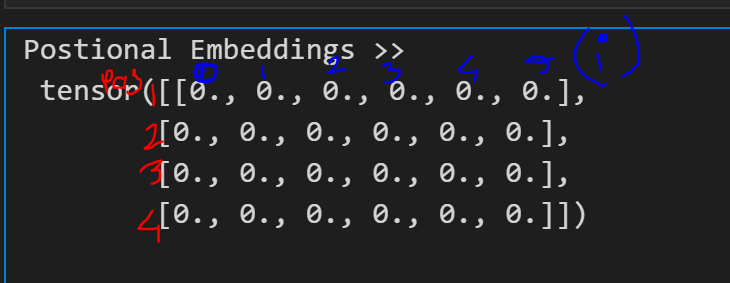

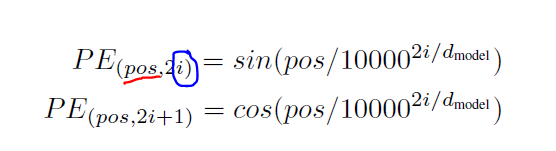

In [90]:
Sentence= "I want to Fly"
sentec_encoded= [0,1,2,3]
no_tokens, seq_len =4,4
d_model=6

input_embeddings = nn.Embedding(4, d_model)
sentec_encoded_tensor = torch.tensor(sentec_encoded, dtype=torch.long)
token_embeddings = input_embeddings(sentec_encoded_tensor)
print("token_embeddings >> \n", token_embeddings)

# positional Embedding vector should have same length as input seq len
pe= torch.zeros(seq_len , d_model )
print("Postional Embeddings >> \n", pe,"\n")

positions=torch.arange(seq_len, dtype=torch.float).unsqueeze(1)
print("Positions >> \n", positions)
print("So now out positions are matching with: positional Embedding vector")

token_embeddings >> 
 tensor([[-1.0946, -0.3075, -0.1185,  0.5651, -1.0582, -0.5058],
        [-1.0584,  0.9440,  2.4941, -0.3190, -0.9263, -0.2684],
        [ 0.2417, -1.3588, -1.4519,  0.2302, -0.5961,  0.0788],
        [ 0.4832,  1.8535, -0.4058,  2.5528,  0.8952,  1.0203]],
       grad_fn=<EmbeddingBackward0>)
Postional Embeddings >> 
 tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]) 

Positions >> 
 tensor([[0.],
        [1.],
        [2.],
        [3.]])
So now out positions are matching with: positional Embedding vector


In [91]:
even_indices= torch.arange(0,d_model,2)
print(even_indices)

even_denominator= torch.pow(10000, even_indices/d_model)
even_denominator

tensor([0, 2, 4])


tensor([  1.0000,  21.5443, 464.1590])

In [92]:
odd_indices= torch.arange(1,d_model,2)
odd_indices

odd_denominator= torch.pow(10000, (odd_indices-1)/d_model)
odd_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [93]:
## odd denominator & even denominator is same
even_denominator == odd_denominator
## hence write one function/code for both
denoinator_term= torch.pow(10000, even_indices/d_model)
denoinator_term

## for better numerical stability 
div_term=torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
div_term
## Values are differents but i'll not make any harm to performance

tensor([1.0000, 0.0464, 0.0022])

In [94]:
# Let's update the even indices in pe embedding vector
pe[:,0::2]= torch.sin(torch.arange(0,d_model,2)/ div_term)

## let's update the odd indices in pe embedding vectot
pe[:,1::2]= torch.cos(torch.arange(1,d_model,2)/ div_term)
pe, pe.shape

(tensor([[ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654],
         [ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654],
         [ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654],
         [ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654]]),
 torch.Size([4, 6]))

In [95]:
pe= pe.unsqueeze(0)
pe, pe.shape # to add batch dimentions, as we'll be passing data in batches

(tensor([[[ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654],
          [ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654],
          [ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654],
          [ 0.0000,  0.5403, -0.7793, -0.2284,  0.0457, -0.6654]]]),
 torch.Size([1, 4, 6]))

In [96]:
token_embeddings=token_embeddings.unsqueeze(0)
token_embeddings

tensor([[[-1.0946, -0.3075, -0.1185,  0.5651, -1.0582, -0.5058],
         [-1.0584,  0.9440,  2.4941, -0.3190, -0.9263, -0.2684],
         [ 0.2417, -1.3588, -1.4519,  0.2302, -0.5961,  0.0788],
         [ 0.4832,  1.8535, -0.4058,  2.5528,  0.8952,  1.0203]]],
       grad_fn=<UnsqueezeBackward0>)

In [97]:
# now we'll add this positional embedding vector with input Token embeddings
token_embeddings.shape, pe.shape

(torch.Size([1, 4, 6]), torch.Size([1, 4, 6]))

In [99]:
# we can add them together
op = token_embeddings + pe[:, :token_embeddings.shape[1], :]
op, op.shape

(tensor([[[-1.0946e+00,  2.3278e-01, -8.9787e-01,  3.3672e-01, -1.0125e+00,
           -1.1712e+00],
          [-1.0584e+00,  1.4843e+00,  1.7148e+00, -5.4733e-01, -8.8059e-01,
           -9.3375e-01],
          [ 2.4166e-01, -8.1847e-01, -2.2312e+00,  1.8200e-03, -5.5037e-01,
           -5.8655e-01],
          [ 4.8322e-01,  2.3938e+00, -1.1851e+00,  2.3244e+00,  9.4094e-01,
            3.5493e-01]]], grad_fn=<AddBackward0>),
 torch.Size([1, 4, 6]))

In [ ]:
# register buffer: 